In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('dados_gerais_04_11_2023.csv',index_col=[0])

# RoadMap

- Segmentação dos dados
    - 1. Recorte do dataset original para pesquisadores e não trabalhadores [Por medida]
    - 2. Recorte das avaliações de cada grupo [Por medida]
    - 3. Recorte do dataset original para pesquisadores e não trabalhadores [Por critérios]
    - 4. Recorte das avaliações de cada grupo [Por critérios]    
- Criação de Radarcharts para:
    - Avaliação pela soma
    - Avaliação pela proporção de 4's e 5's
    - Avaliação pela agregação dos critérios nos 4 subgrupos

In [3]:
df_workers = df[df['What is your segment of acting?']!='Academia/Research Institution']

In [4]:
df_academy = df[df['What is your segment of acting?']=='Academia/Research Institution']

In [5]:
df_academy.head(2)

,M1.1,M1.2,M1.3,M1.4,M1.5,M1.6,M1.7,M1.8,M1.9,M1.10,...,M24.8,M24.9,M24.10,Local,Do you act directly with the circular economy?,Self knowledge about circular economy,What is your segment of acting?,What sector does your organization operate in?,company_size,How do you describe your position in your organization?
0,4.0,4.0,3.0,4.0,4.0,2.0,2.0,2.0,2.0,3.0,...,2.0,2.0,3.0,UK,1,4.0,Academia/Research Institution,Quinary Sector,Grande,senior researcher
1,4.0,4.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,4.0,...,2.0,2.0,4.0,Brazil,1,4.0,Academia/Research Institution,Quinary Sector,Grande,Staff


### Separação - Medidas para Workers

In [6]:
import numpy as np
lista = np.arange(0,24)

In [7]:
lista

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [8]:
workers_medidas={}

In [9]:
for i in lista:
    workers_medidas[i]=pd.DataFrame()
    
for i in np.arange(0,24):
    workers_medidas[i] = pd.DataFrame(df_workers.iloc[:,i*10:(i+1)*10])

### Separação - Medidas para Academy

In [10]:
academy_medidas = {}

In [11]:
for i in lista:
    academy_medidas[i]=pd.DataFrame()
    
for i in np.arange(0,24):
    academy_medidas[i] = pd.DataFrame(df_academy.iloc[:,i*10:(i+1)*10])

### Separação - Critérios para Workers

In [12]:
lista2 = np.arange(1,11)

In [13]:
workers_criterios={}
for i in lista2:
    workers_criterios[i] = pd.DataFrame()

In [14]:
for i in lista2:
    workers_criterios[i]=df_workers.iloc[:,i-1:240:10]

In [15]:
workers_criterios[10].head()

,M1.10,M2.10,M3.10,M4.10,M5.10,M6.10,M7.10,M8.10,M9.10,M10.10,...,M15.10,M16.10,M17.10,M18.10,M19.10,M20.10,M21.10,M22.10,M23.10,M24.10
2,4.0,4.0,3.0,4.0,3.0,5.0,4.0,4.0,5.0,4.0,...,4.0,5.0,5.0,5.0,4.0,5.0,4.0,5.0,5.0,4.0
4,3.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,5.0,...,4.0,5.0,4.0,4.0,4.0,4.0,5.0,5.0,4.0,5.0
5,3.0,5.0,5.0,3.0,5.0,5.0,3.0,5.0,4.0,4.0,...,3.0,4.0,3.0,3.0,2.0,4.0,4.0,4.0,2.0,4.0
6,3.0,3.0,4.0,4.0,3.0,4.0,4.0,4.0,3.0,3.0,...,2.0,2.0,4.0,3.0,3.0,1.0,2.0,2.0,4.0,3.0
7,3.0,4.0,3.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0


### Separação - Critérios para Academy

In [16]:
lista2 = np.arange(1,11)

In [17]:
academy_criterios={}
for i in lista2:
    academy_criterios[i] = pd.DataFrame()

In [18]:
for i in lista2:
    academy_criterios[i]=df_academy.iloc[:,i-1:240:10]

In [19]:
academy_criterios[10].head()

,M1.10,M2.10,M3.10,M4.10,M5.10,M6.10,M7.10,M8.10,M9.10,M10.10,...,M15.10,M16.10,M17.10,M18.10,M19.10,M20.10,M21.10,M22.10,M23.10,M24.10
0,3.0,3.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
1,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
3,4.0,4.0,5.0,5.0,4.0,4.0,2.0,2.0,4.0,4.0,...,3.0,2.0,2.0,4.0,4.0,4.0,5.0,4.0,2.0,4.0
8,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
9,3.0,4.0,5.0,4.0,4.0,4.0,3.0,4.0,5.0,4.0,...,4.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0


### Testando normalidade

In [20]:
from scipy import stats

In [21]:
for coluna in df:
    df[coluna].fillna(df[coluna].mode()[0],inplace=True)

In [22]:
for coluna in df.iloc[:,:-7]:
    df[coluna] = df[coluna].astype(int)

In [23]:
df.iloc[:,:-7].values.reshape(-1)

array([4, 4, 3, ..., 2, 2, 5])

In [24]:
x=df.iloc[:,:-7].values.reshape(-1)

In [25]:
stats.shapiro(x).statistic

C:\Users\ednae\miniconda3\envs\msc\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


0.9095255732536316

Os dados não seguem uma normal

(array([ 8432.,     0., 18026.,     0.,     0., 21075.,     0., 22180.,
            0., 14767.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

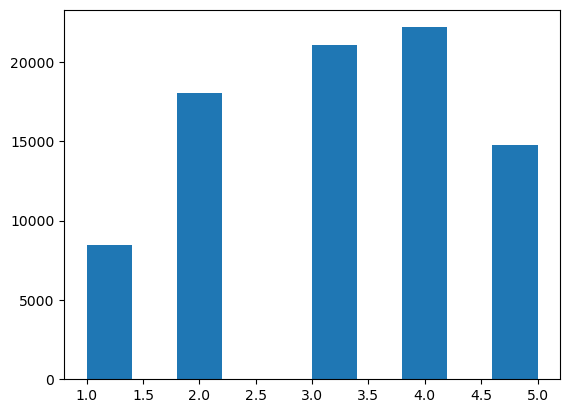

In [26]:
plt.hist(x)

## Testes Pareados

- Para análise entre diferentes medidas para mesmos respondentes

1. Quais medidas possuem maiores medianas?

In [27]:
academy_medidas_medianas = pd.DataFrame()

cont=1
for i in academy_medidas:
    academy_medidas_medianas[cont] = academy_medidas[i].median(axis=1)
    cont+=1

##########

workers_medidas_medianas = pd.DataFrame()

cont=1
for i in workers_medidas:
    workers_medidas_medianas[cont] = workers_medidas[i].median(axis=1)
    cont+=1

In [28]:
workers_medidas_medianas.head(2)

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
2,4.0,4.0,3.0,4.0,3.0,5.0,4.5,4.0,4.5,3.0,...,4.0,4.0,4.5,5.0,4.5,3.5,4.0,5.0,5.0,4.0
4,3.0,3.0,3.0,4.5,2.5,2.0,3.0,3.0,3.0,2.0,...,3.5,4.0,4.0,3.0,3.0,3.5,3.0,3.0,3.0,3.0


In [200]:
academy_medidas_medianas.head(2)

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
0,3.0,3.5,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.5,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.5
1,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0


### Academy_wilcox

In [156]:
from scipy.stats import wilcoxon
res = wilcoxon(academy_medidas_medianas[1].values,y=academy_medidas_medianas[2].values,alternative='greater')

In [157]:
res[1]

0.9980880052855329

In [167]:
np.zeros((24,24)).shape

(24, 24)

Hipóteses para o teste pareado de Wilcox
- `Ho: mediana_linha <= mediana_coluna`
- `H1: mediana_coluna > mediana_linha`

In [168]:
academy_wilcox = pd.DataFrame(np.zeros((24,24)))

In [169]:
linha = 0
for coluna in np.arange(1,25):
    for linha in np.arange(1,25):
        if (linha!=coluna):
            academy_wilcox.loc[linha-1,coluna-1] = wilcoxon(academy_medidas_medianas[linha].values,y=academy_medidas_medianas[coluna].values,alternative='greater')[1]
        else:
            academy_wilcox.loc[linha,coluna] = 1

In [171]:
academy_wilcox = academy_wilcox.iloc[:-1,:-1]

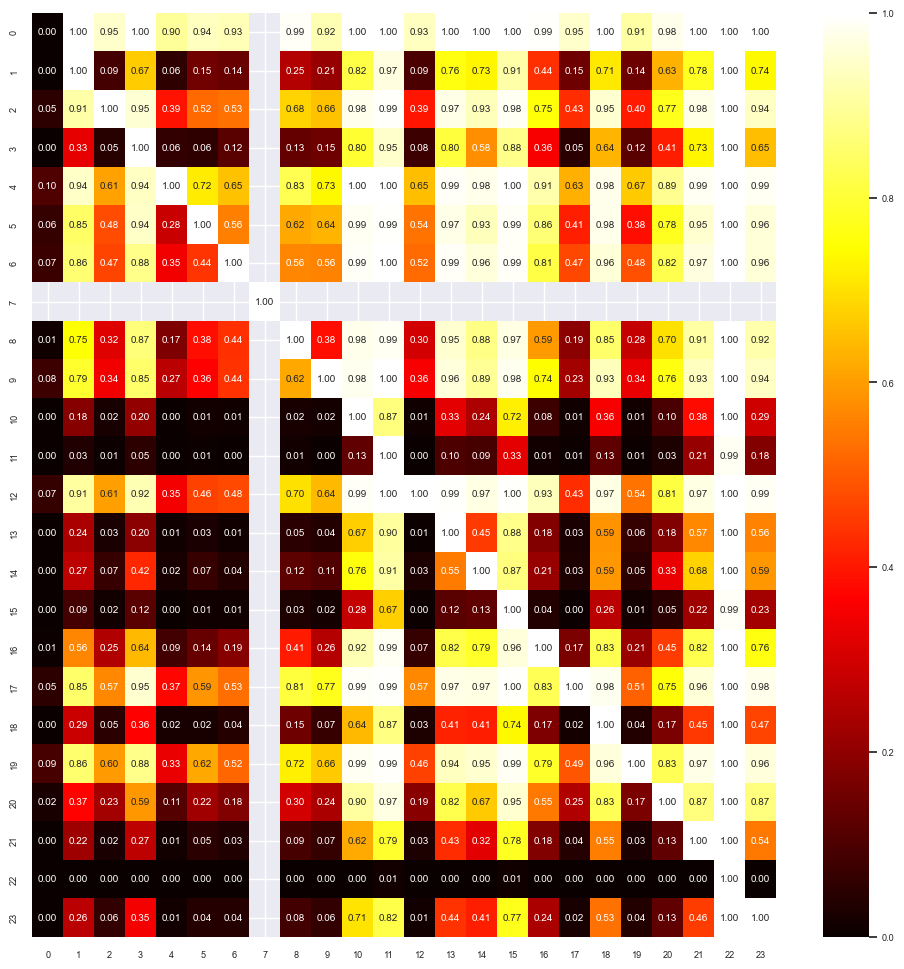

In [199]:
plt.figure(figsize=(12,12))
sns.heatmap(academy_wilcox, cmap='hot', annot=True, fmt=".2f")
sns.set(font_scale=.7)

`Pelo heatmap podemos perceber que a alternativa 22, domina todas as demais, pois para o teste de Wilcox, aceitamos H1, de que a mediana das suas avaliações é superior a todas as demais alternativas`

### Workes_wilcox

Hipóteses para o teste pareado de Wilcox
- `Ho: mediana_linha <= mediana_coluna`
- `H1: mediana_coluna > mediana_linha`

In [202]:
workers_wilcox = pd.DataFrame(np.zeros((24,24)))

In [203]:
linha = 0
for coluna in np.arange(1,25):
    for linha in np.arange(1,25):
        if (linha!=coluna):
            workers_wilcox.loc[linha-1,coluna-1] = wilcoxon(workers_medidas_medianas[linha].values,y=workers_medidas_medianas[coluna].values,alternative='greater')[1]
        else:
            workers_wilcox.loc[linha,coluna] = 1

In [215]:
wilcoxon(workers_medidas_medianas[1],y=workers_medidas_medianas[1])

WilcoxonResult(statistic=nan, pvalue=nan)

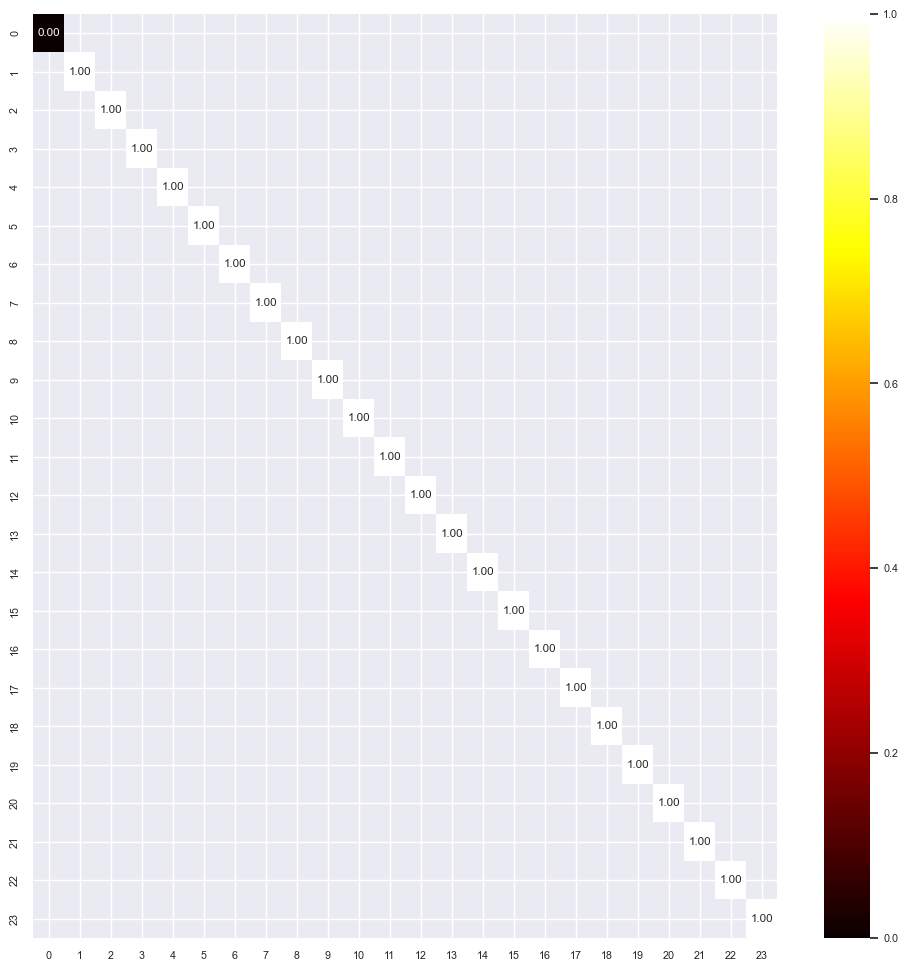

In [205]:
plt.figure(figsize=(12,12))
sns.heatmap(academy_wilcox, cmap='hot', annot=True, fmt=".2f")
sns.set(font_scale=.7)

`Pelo heatmap podemos perceber que a alternativa 22, domina todas as demais, pois para o teste de Wilcox, aceitamos H1, de que a mediana das suas avaliações é superior a todas as demais alternativas`

## Testes não pareados - Para grupos distintos

- Academics vs Professionals

### Radarcharts

In [22]:
academy_criterios[2].median()

M1.2     4.0
M2.2     4.0
M3.2     4.0
M4.2     4.0
M5.2     4.0
M6.2     4.0
M7.2     4.0
M8.2     4.0
M9.2     4.0
M10.2    4.0
M11.2    4.0
M12.2    4.0
M13.2    4.0
M14.2    4.0
M15.2    4.0
M16.2    4.0
M17.2    4.0
M18.2    4.0
M19.2    4.0
M20.2    4.0
M21.2    4.0
M22.2    4.0
M23.2    4.0
M24.2    4.0
dtype: float64